In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed
seed(1337)
import tensorflow
#tensorflow.random.set_seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)

from tensorflow.keras.applications import vgg16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

Text(0.5, 1.0, 'Number of training images per category:')

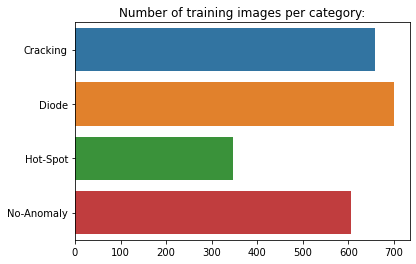

In [ ]:
train_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train"
val_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Validation"
test_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Test"
category_names = sorted(os.listdir('/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

VGG16

In [ ]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f24b00b0450> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd4df50> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd4d150> True
<keras.layers.pooling.MaxPooling2D object at 0x7f24b0002b50> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd4fa50> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd58cd0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f24afd622d0> True
<keras.layers.convolutional.Conv2D object at 0x7f24b00903d0> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd5c5d0> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd72850> True
<keras.layers.pooling.MaxPooling2D object at 0x7f24afd7b910> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd74f90> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd7f410> True
<keras.layers.convolutional.Conv2D object at 0x7f24afd86b10> True
<keras.layers.pooling.MaxPooling2D object at 0x7f24afd0e110> True
<keras.l

In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen =  ImageDataGenerator(
    rescale=1./255.
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2310 images belonging to 4 classes.
Total number of images for "validation":
Found 665 images belonging to 4 classes.
Total number of images for "testing":
Found 665 images belonging to 4 classes.


In [ ]:
learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("vgg16.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vgghistory = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
 4/73 [>.............................] - ETA: 16:32 - loss: 1.5912 - acc: 0.2656

KeyboardInterrupt: ignored

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

In [ ]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0

     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 132 kB 49.9 MB/s 
     |████████████████████████████████| 14.8 MB 30.9 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=96418f7eb4db54eddceec5dbb762603e2a08c7fec093928c0d89443c7cfc1c0e
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=524d348f09b5b43d761f872f945a58ed0012ec318d05f92023e6e70b85567346
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
  

     |████████████████████████████████| 1.3 MB 4.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [ ]:
!pip install -U efficientnet

  Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.


In [ ]:
import efficientnet.keras as efn

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_data_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( val_data_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

Found 2310 images belonging to 4 classes.
Found 665 images belonging to 4 classes.


In [ ]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

AttributeError: ignored